# Supervised Learning with scikit-learn (kNN)

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

# Ignoring future warnings for readability reasons
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# k-Nearest Neighbors

kNN is used for matching based on distance (Euclidean or Manhatten). k is here the hyperparameter which is used to set the number of the nearest neighbors which are used to predict the value.

In the following example, telecomunications churn data is used to train a kNN model aiming to predict consumer churn. Hereby, I use all 3333 observations to train the model with account length and the number of customer service calls as features. An example dataset of three observations are used to compute predictions.

In [2]:
# Import telecominication churn data
churn_df = pd.read_csv("datasets/telecom_churn_clean.csv")

# Dataset
churn_df[["churn", "account_length", "customer_service_calls"]].describe()

,churn,account_length,customer_service_calls
count,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,1.562856
std,0.352067,39.822106,1.315491
min,0.000000,1.000000,0.000000
25%,0.000000,74.000000,1.000000
50%,0.000000,101.000000,1.000000
75%,0.000000,127.000000,2.000000
max,1.000000,243.000000,9.000000


In [3]:
# Split data into X and y
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [4]:
# Split data into X and y
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [5]:
# Additional data
X_new = np.array([[ 35,  20], [99,  29.1], [217,  12.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

Predictions: [1 1 0]


# Validation Set Approach

For testing the model, the data are split into training and test using the train_test_split modeule of scikit learn. The training data is used to train the model whereas the test data is used to test the model and evaluate the MSE (in case of a metric variable) or the precision (qualitative data).

Drwabacks of the validation set approach (Gareth et al. 2023):

1. The validation estimate of the test error rate can be highly variable, depending on pre- cisely which observations are included in the training set and which observations are included in the validation set.

2. In the validation approach, only a subset of the observations — those that are included in the training set rather than in the validation set — are used to fit the model. Since statistical methods tend to perform worse when trained on fewer observations, this suggests that the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set.

## Applying validation set approach on telecomunication churn 

In the following example, the telecomunication data is split into 90% training data and 10% test data. Next, we fit kNN model with k = 6 and compute model accuracy using the test data which equals 85.46 percent which is quite good.

In [6]:
# kNN-Model
knn = KNeighborsClassifier(n_neighbors=6)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=52, stratify=y)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print accuracy
print(knn.score(X_test, y_test))

0.8622754491017964


Next, using validation set approach I train several models for k=1 to k=12 and compute model accuracy for the training and test data. Then, the results are plotted. It is obvous that the model works always better on the training data than on the test data.

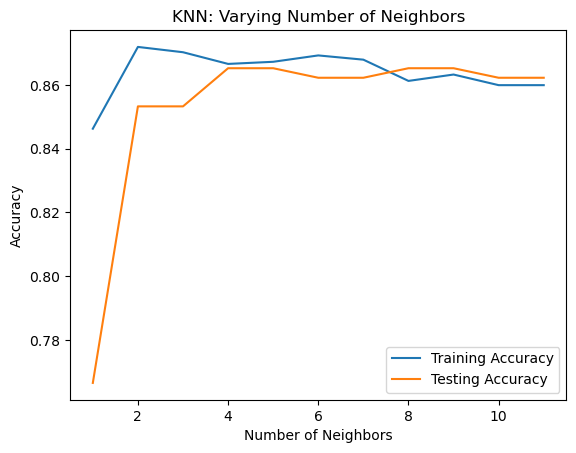

In [7]:
# Create range for neighbors
neighbors = np.arange(1, 12)

train_accuracy = {}
test_accuracy = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracy[neighbor] = knn.score(X_train, y_train)
	test_accuracy[neighbor] = knn.score(X_test, y_test)

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracy.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracy.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# k-fold Cross Validation Approach

The k-fold cross validation approach involves randomly dividing the data into k groups of approximately equal size. The first fold is treated as a test set, and the model is fit on the remaining k − 1 folds. The mean squared error is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which can be averaged to the CV estimate.

### Applying k-fold cross validation approach on telecomunication churn

Next, I apply a k-fold cross validation approach using 10 folds on telecominication churn. The KFold instance is used to define the folding parameters. The cross_val_score instance is used to compute model score which is accuracy in the case of kNN.

In [8]:
# Defining kfolds for cross-validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Computing CV scores
cv_scores = cross_val_score(knn, X, y, cv=kf)

# Print cv scores 
print(cv_scores)

[0.83832335 0.85928144 0.8742515  0.83783784 0.82882883 0.86186186
 0.88888889 0.87687688 0.84084084 0.85885886]


In [9]:
# Evaluating k-fold
print("Lowest accuracy: {}".format(cv_scores.min()))
print("Highest accuracy: {}".format(cv_scores.max()))
print("Mean Accuracy: {}".format(cv_scores.mean()))

Lowest accuracy: 0.8288288288288288
Highest accuracy: 0.8888888888888888
Mean Accuracy: 0.8565850281419143


# Model assessment

### Confusion Matrix

A confusion matrix is an array for true/false positives and negatives. It is used to compute several model scores which have different intentions when it comes to evaluating a models performance.

### Confusion matrix for telecomunication churn

- 285 observations are true positive, i.e. predicted as churned and have cancelled their contract
- 1 observation is false positive, i.e. predicted as churned but has not cancelled her contract
- 47 observations are true negative, i.e. predicted as not churned and have indeed not cancelled their contract
- 1 observation is false negative, i.e. predicted as not chunred but has cancelled her contract


In [10]:
# Defining & training kNN model
knn = KNeighborsClassifier(n_neighbors=neighbor)
knn.fit(X_train, y_train)

# Computing predictions for test data
y_pred = knn.predict(X_test)

# Generate the confusion matrix a
print(confusion_matrix(y_test, y_pred))

[[285   1]
 [ 45   3]]


### Model scores

#### Accuracy

Accuracy can be interpreted as model goodness. It is defined as the ratio of true positives & true negatives to all observations.

#### Preision

Precision is the ratio of true positives to true & false positives. A higher precision implies a lower false positive rate. Or: How many are correctly classified among that class?

#### Recall
Recall is the ratio of true positives to true positives & false negatives. A higher recall implies a lower false negative rate. Or:  How many of this class you find over the whole number of elements of this class?

#### Support
The support is the number of true positives or true negatives in the test data.

#### f1-ccore
Weighted harmonic mean of precision and recall. The higher the precision and the higher the recall, the better is the f1-score.

### Model metrics for telecomunication churn

#### Accuracy

In this case, model accuracy can be interpreted as the share of correct predictions (true churns, true non-churns) with respect to overall size of the test dataset.

#### Precision

Precision is the number of correctly predicted churns relative to the number of predicted churns for the group of true churns in the test data (subsample where churn = 1). Converserly, the second number is the share of correctly predicted non-churns realtive to the overall number of predicted non-churns (subsample where churn = 0).

#### Recall

Recall is the share of correctly predicted churns to the total number of true churns in the test data. Converserly, the seocnd number is the share of correctly predicted non-churns relative to number of non-churns in the test data.

#### f1-Score

The f1-Score ist the weighted average of precision and recall. 

In [11]:
# Generate the classification report
print(classification_report(y_test, y_pred, target_names = ["Churned", "Not churned"]))

              precision    recall  f1-score   support

     Churned       0.86      1.00      0.93       286
 Not churned       0.75      0.06      0.12        48

    accuracy                           0.86       334
   macro avg       0.81      0.53      0.52       334
weighted avg       0.85      0.86      0.81       334



# Hyperparameter Tuning

## GridSearchCV

GridsearchCV trains the models for each hyperparameter along the pre-defined grid and is therefore computationally intensive. In scikitlearn, GridSearchCV is implemented in the model_selection module. In this case, I use GridSearchCV along a scale from 1 to 14 to compute the best value for k. As cross validation approach, I use a k-fold strategy with 5 folds.

In [12]:
# Defining kfolds for cross-validation
kf = KFold(n_splits=3, random_state=42, shuffle=True)

# Set up the parameter grid
param_grid = {"n_neighbors": list(range(1, 12))}

# Initiate knn
knn_cv = GridSearchCV(knn, param_grid, cv=kf)

# Fit to the training data
knn_cv.fit(X_test, y_test)

# Results of GridSearchCV
pd.DataFrame(knn_cv.cv_results_).iloc[1:,5:].sort_values("rank_test_score")

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,{'n_neighbors': 6},0.839286,0.846847,0.882883,0.856338,0.019022,1
9,{'n_neighbors': 10},0.839286,0.846847,0.882883,0.856338,0.019022,1
10,{'n_neighbors': 11},0.839286,0.846847,0.882883,0.856338,0.019022,1
7,{'n_neighbors': 8},0.839286,0.846847,0.873874,0.853335,0.014847,4
8,{'n_neighbors': 9},0.839286,0.846847,0.873874,0.853335,0.014847,4
3,{'n_neighbors': 4},0.830357,0.846847,0.873874,0.850359,0.017938,6
1,{'n_neighbors': 2},0.839286,0.837838,0.873874,0.850332,0.016657,7
4,{'n_neighbors': 5},0.812500,0.855856,0.873874,0.847410,0.025758,8
6,{'n_neighbors': 7},0.821429,0.846847,0.873874,0.847383,0.021414,9
2,{'n_neighbors': 3},0.839286,0.837838,0.837838,0.838320,0.000683,10


In [13]:
# Print best parameters
print("Tuned k: {}".format(knn_cv.best_params_))
print("Tuned k score: {}".format(knn_cv.best_score_))

Tuned k: {'n_neighbors': 6}
Tuned k score: 0.8563384813384812


## RandomizedSearchCV

RandomizedSearchCV explores random combinations of hyperparameters within specified distributions or ranges. Instead of specifying value grids, probability distributions or ranges for hyperparameters are defined. The algorithm samples randomly combinations of these hyperparameters or distributions and computes scores.

The following example applies randomized search by picking 5 values for k randomly from a list of 1 to 10 and computes model accuracy using 5-fold cross validation approach. According to scikit-learn, the algorithm samples without replacement which makes pretty much sense when parameter space is not infinite. This use case is pretty simple since the hyperparameter space is one-dimensional (we only have to set the number of neighbors chosen for the prediction). 

The apporach becomes more interesting when the hyperparameter space is multi-dimensional and combinations of hyperparameters are chosen randomly. This approach is even more powerful when using parameter distributions instead of lists.


In [28]:
# Set up the parameter grid
param_grid = {"n_neighbors": list(range(1, 10))}

# Initiate knn
knn_cv = RandomizedSearchCV(knn, param_grid, cv=kf, n_iter = 5, random_state = 42)

# Fit to the training data
knn_cv.fit(X_test, y_test)

# Results of GridSearchCVß
pd.DataFrame(knn_cv.cv_results_).iloc[1:,5:].sort_values("rank_test_score")

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,{'n_neighbors': 6},0.839286,0.846847,0.882883,0.856338,0.019022,1
4,{'n_neighbors': 9},0.839286,0.846847,0.873874,0.853335,0.014847,2
1,{'n_neighbors': 2},0.839286,0.837838,0.873874,0.850332,0.016657,4
3,{'n_neighbors': 1},0.776786,0.765766,0.774775,0.772442,0.004792,5
